In [127]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# with open('output/levenshtein.json','r') as out:
#     for line in out:
#         data_1 = json.loads(line)
        
# with open('output/levenshtein_soundex.json','r') as out:
#     for line in out:
#         data_2 = json.loads(line)
        
# with open('output/levenshtein_metaphone.json','r') as out:
#     for line in out:
#         data_3 = json.loads(line)

with open('output/all_token_results/levenshtein.json','r') as out:
    for line in out:
        data_1 = json.loads(line)
        
with open('output/all_token_results/levenshtein_soundex.json','r') as out:
    for line in out:
        data_2 = json.loads(line)
        
with open('output/all_token_results/levenshtein_metaphone.json','r') as out:
    for line in out:
        data_3 = json.loads(line)

In [165]:
levenshtein = pd.DataFrame(data_1)
levenshtein_soundex = pd.DataFrame(data_2)
levenshtein_metaphone = pd.DataFrame(data_3)

In [166]:
# Count candidates length for each token
levenshtein['candidate_len'] = levenshtein_soundex.candidates.str.len()
levenshtein_soundex['candidate_len'] = levenshtein_soundex.candidates.str.len()
levenshtein_metaphone['candidate_len'] = levenshtein_metaphone.candidates.str.len()

In [167]:
def compute_analysis(ds_1, part):
    candidates = ds_1.query('candidate_len > 0')
    is_correct = candidates.query('is_correct == True')
    
    precision = float(is_correct.token.count()) / float(candidates.token.count())
    recall = float(is_correct.token.count()) / float(ds_1.token.count())
    
    mean = candidates.candidate_len.mean()
    maximum = candidates.candidate_len.max()
    
    result = {
        "part": part,
        "precision": precision,
        "recall": recall,
        "mean": mean,
        "max": maximum
    }
    
    return result

In [168]:
# combine analysis
combine_results = []
combine_results.append(compute_analysis(levenshtein, "levenshtein"))
combine_results.append(compute_analysis(levenshtein_soundex, "levenshtein_soundex"))
combine_results.append(compute_analysis(levenshtein_metaphone, "levenshtein_metaphone"))

combine_results = pd.DataFrame(combine_results)
combine_results[['part','precision','recall','max', 'mean']]

,part,precision,recall,max,mean
0,levenshtein,0.811095,0.697885,6.0,1.17313
1,levenshtein_soundex,0.883923,0.760892,6.0,1.17313
2,levenshtein_metaphone,0.909542,0.747539,1.0,1.00000


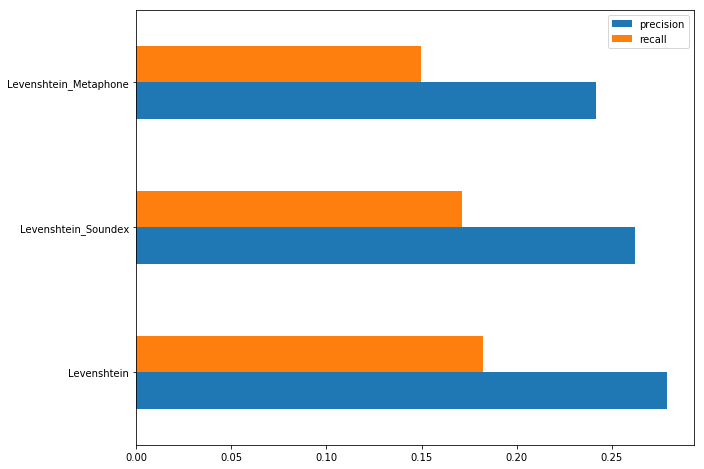

In [163]:
rects = combine_results[['part','precision', 'recall']].plot(kind='barh', legend=True, figsize=(10, 8));
rects.set_yticklabels(('Levenshtein','Levenshtein_Soundex','Levenshtein_Metaphone'))
plt.show()

{'max': 4,
 'mean': 1.1491875923190547,
 'precision': 0.8522895125553914,
 'recall': 0.7203495630461922}

In [169]:
levenshtein_metaphone

,best_match,candidates,canonical,is_correct,token,candidate_len
0,new,[new],new,True,new,1
1,pix,[pix],pictures,False,pix,1
2,,[],coming,False,comming,0
3,,[],tomorrow,False,tomoroe,0
4,dang,[dang],dang,True,dang,1
5,,[],fucking,False,effin,0
6,,[],greenbay,False,greenbay,0
7,bullshit,[bullshit],bullshit,True,bullshit,1
8,calls,[calls],calls,True,calls,1
9,nd,[nd],and,False,nd,1


In [157]:
data_4[:20]

[{u'best_match': u'pix',
  u'candidates': [u'pix'],
  u'canonical': u'pictures',
  u'is_correct': False,
  u'token': u'pix'},
 {u'best_match': u'coming',
  u'candidates': [u'coming',
   u'commaing',
   u'coaming',
   u'combing',
   u'cumming',
   u'tomming',
   u'comping'],
  u'canonical': u'coming',
  u'is_correct': True,
  u'token': u'comming'},
 {u'best_match': u'',
  u'candidates': [],
  u'canonical': u'tomorrow',
  u'is_correct': False,
  u'token': u'tomoroe'},
 {u'best_match': u'dang',
  u'candidates': [u'dang'],
  u'canonical': u'dang',
  u'is_correct': True,
  u'token': u'dang'},
 {u'best_match': u'',
  u'candidates': [],
  u'canonical': u'fucking',
  u'is_correct': False,
  u'token': u'effin'},
 {u'best_match': u'greenway',
  u'candidates': [u'greenway',
   u'greenaway',
   u'greenbank',
   u'greeny',
   u'greenbark',
   u'greenback'],
  u'canonical': u'greenbay',
  u'is_correct': False,
  u'token': u'greenbay'},
 {u'best_match': u'nd',
  u'candidates': [u'nd'],
  u'canonical'